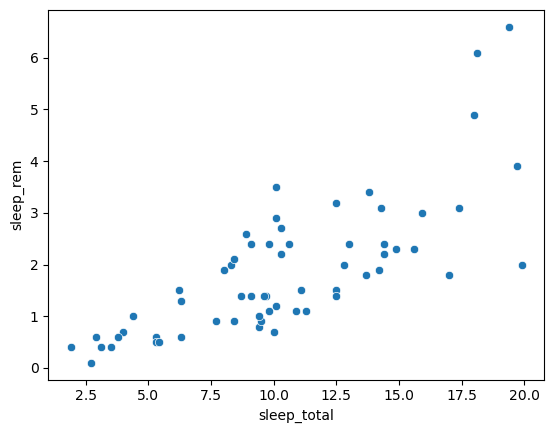

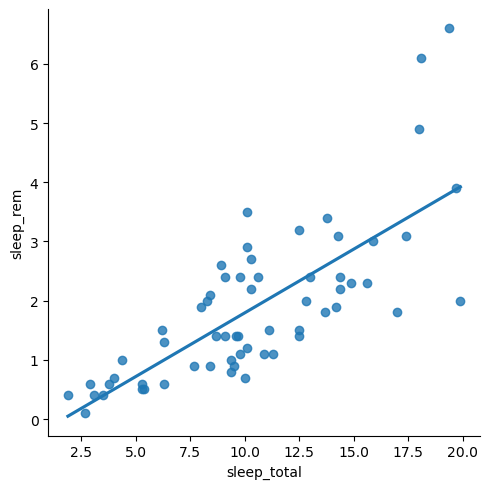

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_sleep = pd.read_csv("data/msleep.csv") #pozitif yünde doğrusal bir ilişki 
sns.scatterplot(x="sleep_total", y="sleep_rem",data = df_sleep) #scatterplot fonksiyonu ile df_sleep DataFrame'indeki sleep_total ve sleep_rem 
#sütunlarını kullanarak bir saçılım grafiği (scatter plot) çiziyoruz. Bu iki değişken arasındaki ilişkiyi noktalar halinde gösterir.

sns.lmplot(x="sleep_total", y="sleep_rem",data = df_sleep,ci=None) #fonksiyonu kullanılarak, yine sleep_total ve sleep_rem değişkenleri arasında
#bir doğrusal regresyon grafiği çiziyoruz. ci=None parametresi, güven aralığını göstermemek için kullanılır.
#plt.show() gerek yok 

In [4]:
df_sleep["sleep_total"].corr(df_sleep["sleep_rem"]) # korelasyonu verir. 2 ilişkinin ne kadar güçlü olduğunun
                                                    #sayıyla gösterimi.

0.7517549992287144

In [5]:
df_sleep.corr(numeric_only=True) #her  değişkenin veri setindeki diğer değişkenlerle arasındaki corr. neden true
#neden true çünkü string değerler vardı.

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
sleep_total,1.000000,0.751755,-0.473713,-0.999999,-0.360487,-0.312011
sleep_rem,0.751755,1.000000,-0.338123,-0.751771,-0.221335,-0.327651
sleep_cycle,-0.473713,-0.338123,1.000000,0.473713,0.851620,0.417803
awake,-0.999999,-0.751771,0.473713,1.000000,0.360487,0.311980
brainwt,-0.360487,-0.221335,0.851620,0.360487,1.000000,0.933782
bodywt,-0.312011,-0.327651,0.417803,0.311980,0.933782,1.000000


<Axes: >

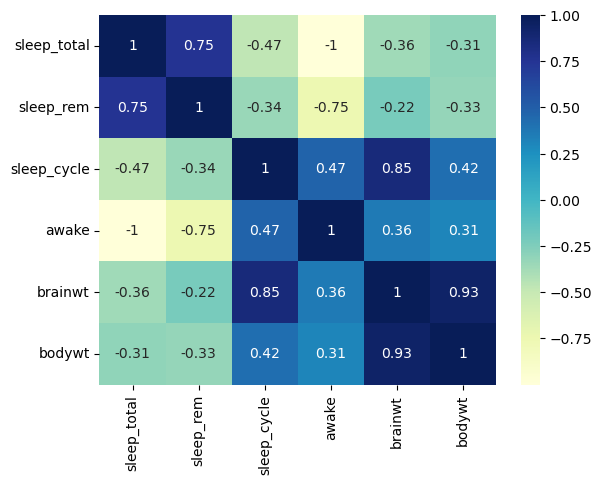

In [9]:
sns.heatmap(df_sleep.corr(numeric_only=True),annot= True,cmap="YlGnBu") #annot pierson katsayıları ekliyor kutulara ,heatmap grafiği 
                                                                  #renkleştiriyo , cmap renk değiştiriyo

0.31198014973502586


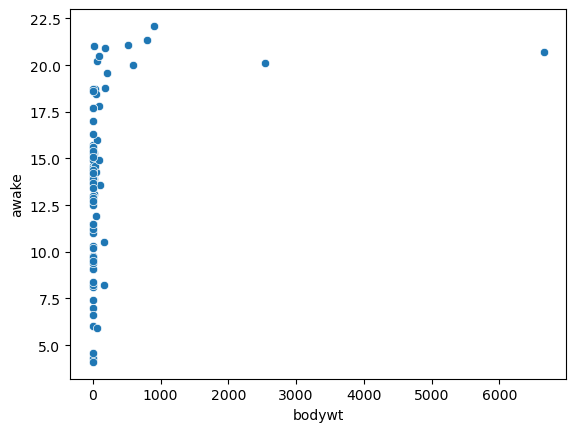

In [11]:
sns.scatterplot(x="bodywt", y="awake",data = df_sleep) #bodwt ile awake arasında corr katsayısına bakarak
#hemen ilişki düşüktür ya da yüksetktir diyemezsin(0,311) grafiğini çizdirdiğinde farkederisn ki linear değil ilişki yok.
print(df_sleep["bodywt"].corr(df_sleep["awake"]))

#sns.scatterplot(x="bodywt", y="awake", data=df_sleep): Seaborn'un scatterplot fonksiyonu kullanılarak, df_sleep DataFrame'indeki bodywt 
#(vücut ağırlığı) ve awake (uyanık kalma süresi) sütunları kullanılarak bir saçılım grafiği çizilir. Bu grafik, iki değişken arasındaki
#ilişkiyi görsel olarak gösterir. Bu grafik, veriler arasında lineer bir ilişki olup olmadığını görmek için yararlıdır.

#print(df_sleep["bodywt"].corr(df_sleep["awake"])): Burada Pandas'ın corr() fonksiyonu kullanılarak bodywt ve awake sütunları arasındaki
#korelasyon katsayısı hesaplanır ve ekrana yazdırılır. Korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü ölçer.
#+1'e yakın değerler güçlü pozitif ilişkiyi, -1'e yakın değerler güçlü negatif ilişkiyi, 0'a yakın değerler ise çok zayıf ya da yok denecek
#kadar az bir ilişkiyi gösterir. Yorum olarak belirttiğin gibi, bu örnekte korelasyon katsayısı 0.311 olduğunda, bodywt ve awake arasında zayıf
#bir pozitif ilişki olduğu sonucuna varılabilir.

<Axes: xlabel='bodywt', ylabel='awake'>

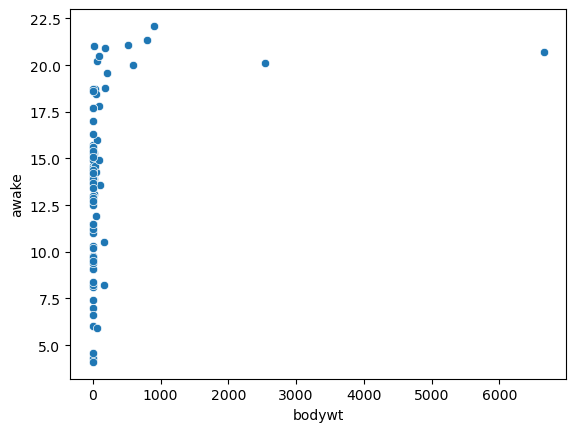

In [15]:
sns.scatterplot(x="bodywt", y="awake",data = df_sleep)

In [13]:
print(df_sleep["bodywt"].corr(df_sleep["awake"]))

0.31198014973502586


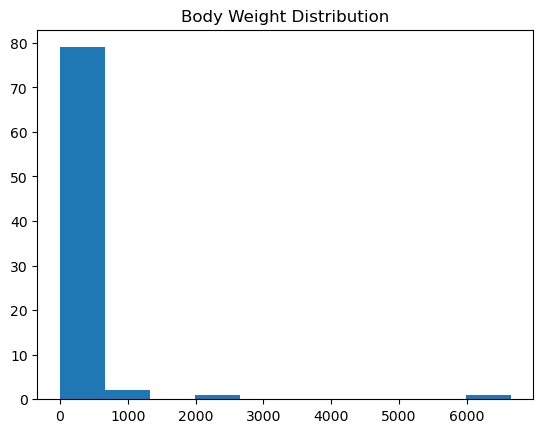

In [12]:
plt.hist(df_sleep["bodywt"]) #Histogram, verilerin dağılımını gösteren çubuk grafik şeklinde bir grafiktir. Bu grafik, verilerin ne kadar sık
# ve hangi aralıklarda olduğunu gösterir, böylece vücut ağırlığının dağılımını görselleştirmiş oluruz
plt.title("Body Weight Distribution")
plt.show()

#vücut ağırlığı dağılımına bakılırsa oldukça çarpık 

<Axes: xlabel='bodywt', ylabel='Count'>

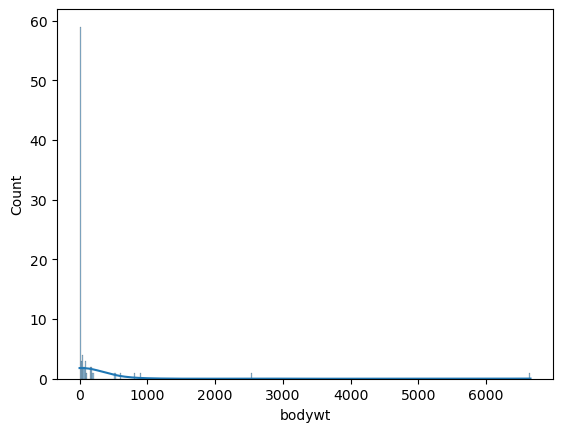

In [14]:
sns.histplot(data=df_sleep,x="bodywt", kde=True) #KDE, veri setinin sürekli bir yoğunluk tahminini görselleştirmek için kullanılır. 
#kde=True parametresi eklenmesi, histogramın üzerine bir çekirdek yoğunluk tahmini çizilmesini sağlar. Bu yoğunluk grafiği, veri dağılımının
#daha pürüzsüz bir şekilde görüntülenmesine olanak tanır ve özellikle veri setindeki yoğunlukların nerede olduğunu gösterir.

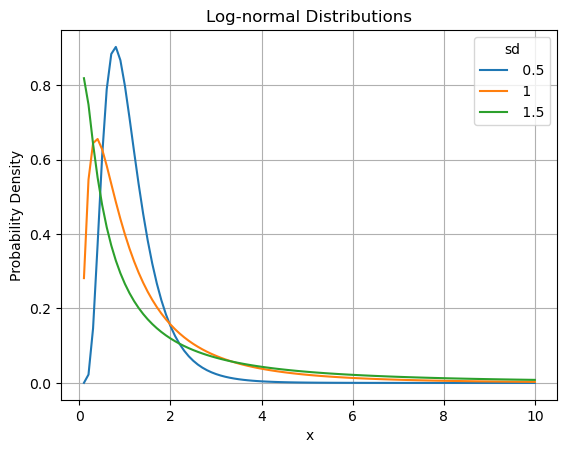

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# X ekseni için değerler
x = np.linspace(0.1, 10, 100)

# Farklı log-normal dağılımlar için parametreler
params = [
    {'s': 0.5, 'scale': np.exp(0)},  # dar
    {'s': 1, 'scale': np.exp(0)},  # Orta 
    {'s': 1.5, 'scale': np.exp(0)},  # geniş 
]

for param in params:
    pdf = lognorm.pdf(x, param['s'], loc=0, scale=param['scale'])
    plt.plot(x, pdf, label=f" {param['s']}")

# Grafik ayarları
plt.title('Log-normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend(title="sd")
plt.grid(True)
plt.show()

In [18]:
#nasıl lineerleştirebilirim ?
#log transformation 

import numpy as np

df_sleep["log_bodywt"] = np.log(df_sleep["bodywt"])
print(df_sleep["log_bodywt"].corr(df_sleep["awake"]))

sns.lmplot(x="log_bodywt", y="awake", data=df_sleep ,ci=None)
plt.show()
print() 

KeyError: 'log_bodywt'

Korelasyon katsayısı: 0.5687943427609856


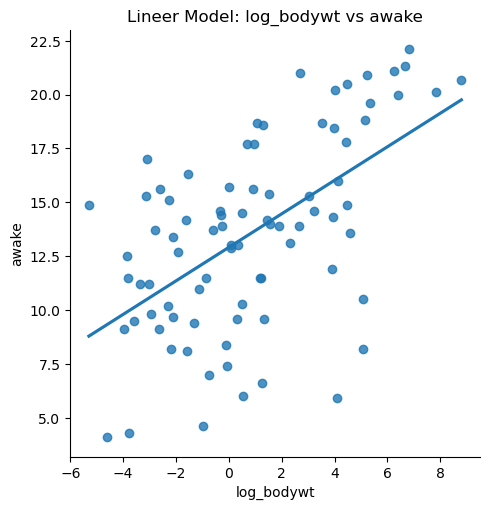

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
df_sleep = pd.read_csv("data/msleep.csv")

# bodywt sütununun logaritmasını al ve yeni bir sütun oluştur
df_sleep['log_bodywt'] = np.log(df_sleep['bodywt'])

# log_bodywt ile awake arasındaki korelasyonu hesapla ve yazdır
correlation = df_sleep['log_bodywt'].corr(df_sleep['awake'])
print("Korelasyon katsayısı:", correlation)
# log_bodywt ve awake arasında lineer regresyon modeli çiz
sns.lmplot(x='log_bodywt', y='awake', data=df_sleep, ci=None)
plt.title("Lineer Model: log_bodywt vs awake")
plt.show()
